Importujemy wymagane biblioteki

In [1]:
from os import getcwd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Ustawiamy sns jako domyślny dla przedstawiania danych, importujemy plik

In [2]:
sns.set()
titanicSet = pd.read_csv('{z}/{x}'.format(z = getcwd(), x = 'titanic.csv'), sep = '\t') 

Najpierw zapoznamy się z tym jakie dane przedstawiają nam kolumny

In [3]:
titanicSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Oto co możemy wyczytać z nazw kolumn + opisu na stronie:
**Survived**: Czy dana osoba przetrwała 0 - Nie, 1 - Tak  
**pclass**: Klasa biletu co przekłada się na klase socjo-społeczną:  1 - 1sza (klasa wyższa), 2 - 2ga (klasa średnia), 3 - 3cia (klasa robotnicza)  
**sibsp**: Ilość rodzeństwa / partnerów na pokładzie  
**parch**: Ilość rodziców / dzieci na pokładzie  
**ticket**: Numer biletu  
**cabin**: Numer kajuty  
**embarked**: Port wypłynięcia C - Cherbourg, Q - Quuenstown, S - Southampton  

Teraz dowiemy się ile wartości jakiego typu występuje w naszym zbiorze:

In [4]:
titanicSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [5]:
titanicSet.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

Widzimy, że niektórych wartości brakuje - trzeba będzie je uzupełnić czym zajmiemy się w późniejszej fazie.  

Teraz przejdźmy do wstępnej analizy. W tym celu zdefinuję funkcję, która rysuje wykres słupkowy przedstawiający ilości osób, które przeżyły i umarły w związku z innymi zmiennymi.

In [6]:
def wykres_slupki(zmienna):
    przetrwali = titanicSet[titanicSet['Survived']==1][zmienna].value_counts()
    martwi = titanicSet[titanicSet['Survived']==0][zmienna].value_counts()
    df = pd.DataFrame([przetrwali,martwi])
    df.index = ['Przetrwali','Martwi']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

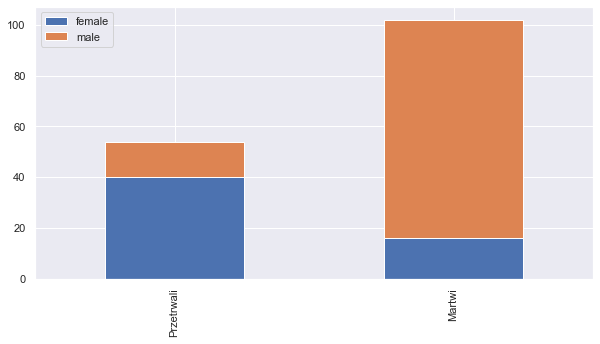

In [7]:
wykres_slupki('Sex')

Ten wykres mówi nam, że kobiety miały większą szansę na przetrwanie niż mężczyźni

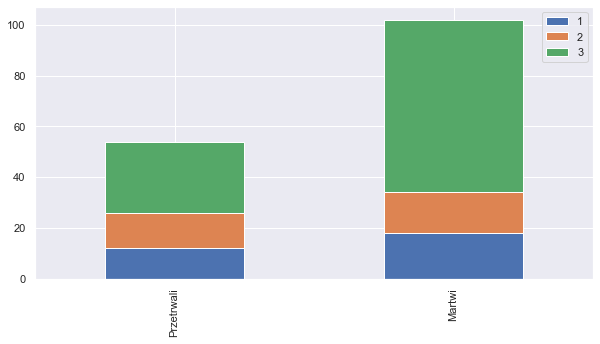

In [8]:
wykres_slupki('Pclass')

Z tego wykresu możemy odczytać, że osoby z klasy roboczej miały o wiele większą szansę na śmierć  
Osoby z klasy wyższej miały nieznacznie większą szansę na śmierć

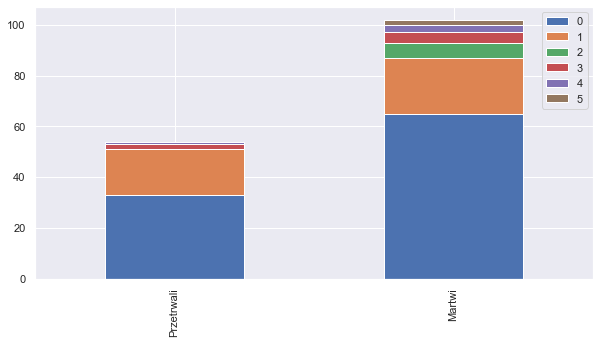

In [9]:
wykres_slupki('SibSp')

Tutaj widzimy, że osoby samotne miały znacząco mniejszą szansę na przetrwanie. 

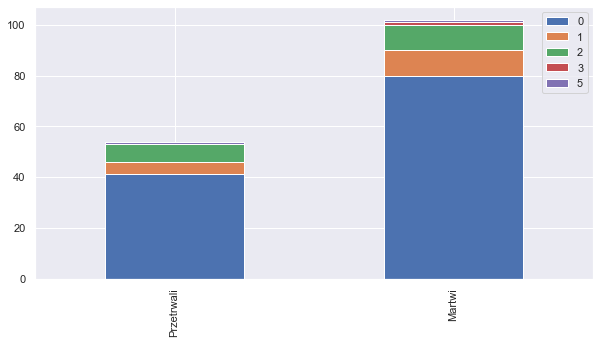

In [10]:
wykres_slupki('Parch')

Tutaj widzimy, że osoby bez krewnych miały znacząco mniejszą szansę na przetrwanie.  
Osoby z 1 lub 2 krewnych miały zbliżone szanse na przetrwanie.

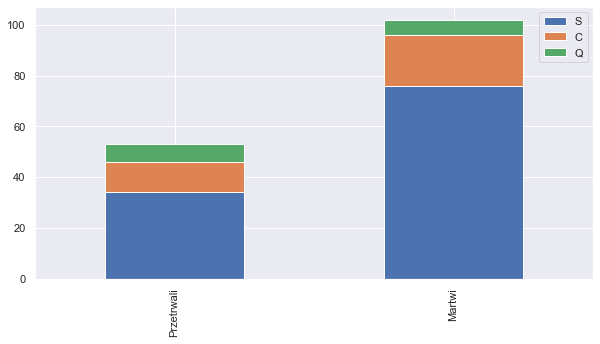

In [11]:
wykres_slupki('Embarked')

Osoby wyruszające z Cherbourg i Southampton miały znacząco mniejsze szanse na przetrwanie.
Osoby wyruszające z Queenstown miały mniej więcej równe szanse na przetrwanie co na śmierć.

Przejdźmy do **uzupełniania danych** i uspójnienia niektórych elementów.  
Spójrzmy ponownie na kolumny w naszym zbiorze danych:

In [12]:
titanicSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Są tu informacje, które nie dają nam zbyt wiele przydatnych informacji. Jest to przede wszystkim imie i numer biletu.  
Kolumnę z numerem biletu usuniemy, a imie zastąpimy tytułem, który przy nim stoi - Mr, Miss, Mrs i inne

In [13]:
titanicSet.drop('Ticket', axis=1, inplace=True)
titanicSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [14]:
titanicSet['Title'] = titanicSet['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [15]:
titanicSet['Title'].value_counts()

Mr        89
Miss      34
Mrs       22
Master     8
Rev        2
Don        1
Name: Title, dtype: int64

Zbierzmy wszystkie pozostałe tytułu w jeden.

In [16]:
tytuly_dict = {'Mr':'Mr', 'Miss':'Miss', 'Mrs':'Mrs', 'Master':'Other', 'Rev':'Other', 'Don':'Other'}
titanicSet['Title'] = titanicSet['Title'].map(tytuly_dict)

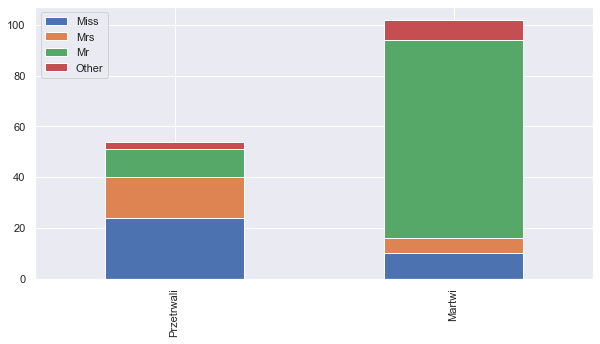

In [17]:
wykres_slupki('Title')

Zgodnie ze schematem tytułów dowiadujemy się, że zdecydowanie **największe** szanse na przetrwanie miały samotne kobiety.  
**Najmniejsze** szanse natomiast mieli samotni mężczyźni

### Uzupełnijmy dane dotyczące wieku:
Zrobimy to biorąc pod uwagę medianę wieku danego tytułu.

In [18]:
titanicSet['Age'].fillna(titanicSet.groupby("Title")["Age"].transform("median"), inplace=True)

In [19]:
titanicSet.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          125
Embarked         1
Title            0
dtype: int64

#### Pozbyliśmy się wartości nieznanych z naszego zbioru danych. Teraz możemy przedstawić te dane na wykresie.

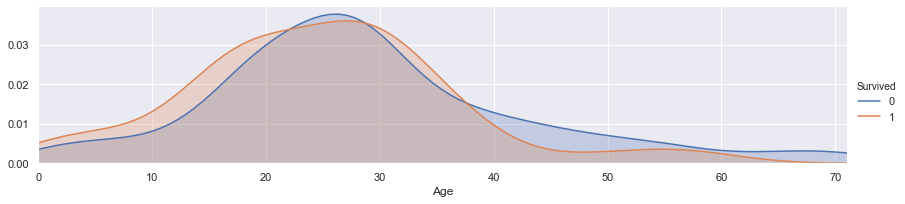

In [20]:
wykres = sns.FacetGrid(titanicSet, hue="Survived", aspect = 4)
wykres.map(sns.kdeplot,'Age', shade = True)
wykres.set(xlim=(0, titanicSet['Age'].max()))
wykres.add_legend()
 
plt.show()

W miejscach, w których pomarańczowy wykres przebija się nad niebieskim możemy stwierdzić, że w danym wieku prawdopodobieństwo przeżycia było wyższe.  

Z moich obserwacji zatem wynika, że największe prawdopodobieństwo przeżycia było w wieku między 16/17, a 32/33 rokiem życia. Uściślimy te dane uogulniając dane dotyczące wieku w 5 kategoriach

**Dzieci: >17**  
**Młodzież: 17-26**  
**Młodzi dorośli: 26-36**  
**Dorośli: 36-62**  
**Seniorzy: 62+**

In [21]:
titanicSet.head(50)

warunki = [
    titanicSet['Age'] <= 16,
    (titanicSet['Age'] > 16) & (titanicSet['Age'] <= 26),
    (titanicSet['Age'] > 26) & (titanicSet['Age'] <= 36),
    (titanicSet['Age'] > 36) & (titanicSet['Age'] <= 62),
    titanicSet['Age'] > 62
]
wybory = ['Dziecko', 'Młodzież', 'Młody dorosły', 'Dorosły', 'Senior']

titanicSet['Age'] = np.select(
   warunki, wybory, default='')

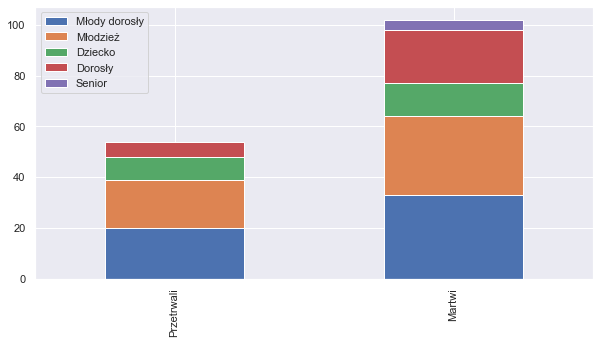

In [22]:
wykres_slupki('Age')

Jak widać moja obserwacja była prawidłowa. Żaden z seniorów nie przeżył, a osoby w wieku dorosłym miały znacząco mniejsze szanse na przeżycie niż osoby młodsze.  

### Teraz uzupełnimy kolejne wartości - miejsce wypłynięcia i ceny biletów

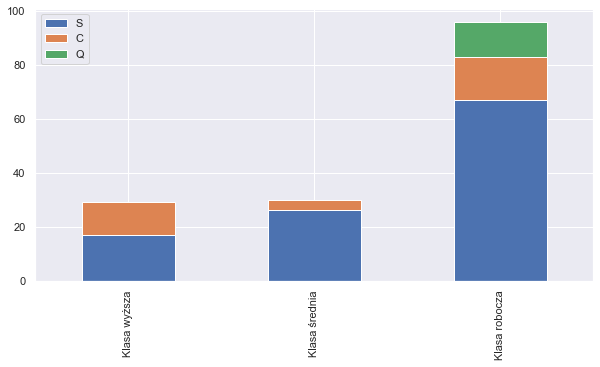

In [23]:
klasa1 = titanicSet[titanicSet['Pclass']==1]['Embarked'].value_counts()
klasa2 = titanicSet[titanicSet['Pclass']==2]['Embarked'].value_counts()
klasa3 = titanicSet[titanicSet['Pclass']==3]['Embarked'].value_counts()
data = pd.DataFrame([klasa1, klasa2, klasa3])
data.index = ['Klasa wyższa','Klasa średnia', 'Klasa robocza']
data.plot(kind='bar',stacked=True, figsize = (10,5))

Możemy zaobserwować, że wszyscy startujący z Queenstown należą do klasy średniej. Co nas interesuje to to, że ponad połowa każdej z klas społecznych startowała z Southampton, więc z racji, że brakuje nam tych danych tylko dla 1 pasażera to uzupełnimy je właśnie Southampton. 

In [24]:
titanicSet['Embarked'] = titanicSet['Embarked'].fillna('S')

### Brakujące ceny biletów uzupełnimy medianą ceny w każdej klasie społecznej.

In [25]:
titanicSet['Fare'].fillna(titanicSet.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [26]:
titanicSet.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,Młodzież,1,0,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Dorosły,1,0,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,Młodzież,0,0,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Młody dorosły,1,0,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,Młody dorosły,0,0,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,Młody dorosły,0,0,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,Dorosły,0,0,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Dziecko,3,1,21.0750,NaN,S,Other
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Młody dorosły,0,2,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Dziecko,1,0,30.0708,NaN,C,Mrs


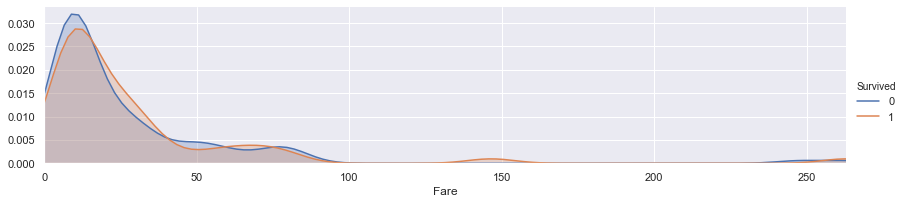

In [27]:
facet = sns.FacetGrid(titanicSet, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, titanicSet['Fare'].max()))
facet.add_legend()
 
plt.show()

Jak widać w okolicy ceny 150j szansa na przetrwanie była naprawdę wysoka.  
Tak samo szansa na przeżycie była wyższa po przekroczeniu ~20j aż do ~40j.

#### Następnym zadaniem będzie połączenie w jedną zmienną wartości Parch and SibSp w jedną - wielkość rodziny

In [28]:
titanicSet['FamilySize'] = titanicSet['SibSp'] + titanicSet['Parch'] + 1 
#+1, gdyż każda osoba jest członkiem własnej rodziny
titanicSet = titanicSet.drop(['SibSp','Parch'], axis = 1)
titanicSet.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,Młodzież,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Dorosły,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,Młodzież,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Młody dorosły,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,Młody dorosły,8.0500,NaN,S,Mr,1
5,6,0,3,"Moran, Mr. James",male,Młody dorosły,8.4583,NaN,Q,Mr,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,Dorosły,51.8625,E46,S,Mr,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Dziecko,21.0750,NaN,S,Other,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Młody dorosły,11.1333,NaN,S,Mrs,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Dziecko,30.0708,NaN,C,Mrs,2


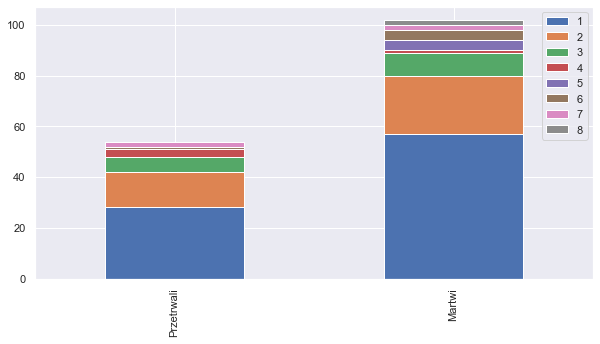

In [29]:
wykres_slupki('FamilySize')

Największe szanse na przeżycie miały osoby z 3-ką i 4-ką osób w rodzinie. Powyżej i poniżej takiego rozmiaru rodziny szanse znacząco malały.

Jeśli chodzi o numery kajuty to interesuje nas wyłącznie litera w numerze, gdyż to ona mówiła o sektorze statku w jakim kajuta się znajduje.  
Teraz zmodyfikujemy wartość kajuty, aby została sama litera i **wypełnimy nieznane wartości biorąc pod uwagę medianę występującą w danej klasie społecznej.**

W celu uzupełnienia danych zamienimy litery w kabinach na liczby:

In [30]:
titanicSet['Cabin'] = titanicSet['Cabin'].str[:1]
dirKabiny = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
titanicSet['Cabin'] = titanicSet['Cabin'].map(dirKabiny)

titanicSet['Cabin'].fillna(titanicSet.groupby('Pclass')['Cabin'].transform('median'), inplace=True)


In [31]:
titanicSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,Młodzież,7.2500,6.0,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Dorosły,71.2833,3.0,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,Młodzież,7.9250,6.0,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Młody dorosły,53.1000,3.0,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,Młody dorosły,8.0500,6.0,S,Mr,1


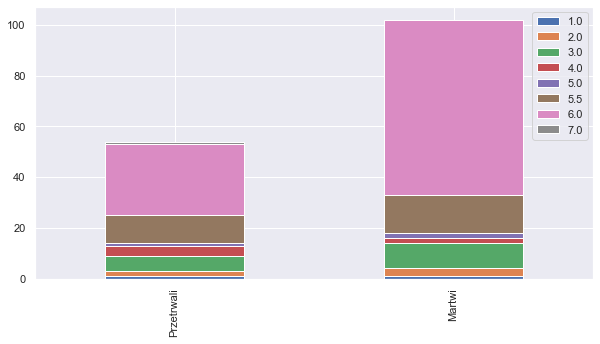

In [32]:
wykres_slupki('Cabin')

Największe szanse procentowe mieli pasażerowie kajut w sektorze 4 (D)

### Podsumowanie:  
W toku analizy powyższych danych najważniejszym czynnikiem wpływającym na przetrwanie jest płeć. Bycie kobietą znacząco zwiększało szansę na przetrwanie. Następnymi ważnymi czynnikami są:  
- status rodzinny (kombinacja ilości członków rodziny, tytułu przy imieniu)
- status socjo-społeczny przejawiający się w klasie biletu, kajucie, cenie za bilet i samej klasie biletu  

Wiek również odegrał znaczącą rolę - osoby w wieku poniżej 20 lat i w wieku między 30-35 lat miały zdecydowanie większe szanse na przeżycie